In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
root_folder = "art500k_period"

data = []

for folder in os.listdir(root_folder):
    folder_path = os.path.join(root_folder, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".jpg"):
                file_path = os.path.join(folder_path, file)
                data.append((file_path, float(folder)))

df = pd.DataFrame(data, columns=["path", "period_label"])
df.head()

,path,period_label
0,art500k_period/1.0/823.jpg,1.0
1,art500k_period/1.0/16750.jpg,1.0
2,art500k_period/1.0/16988.jpg,1.0
3,art500k_period/1.0/The Ascension##dQE3OyMRBV0s...,1.0
4,art500k_period/1.0/32180.jpg,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235161 entries, 0 to 235160
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   path          235161 non-null  object 
 1   period_label  235161 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [14]:
df.isnull().sum()

path            0
period_label    0
dtype: int64

In [15]:
label_counts = df["period_label"].value_counts().sort_index()
label_counts

period_label
0.0        56
1.0      3066
2.0     16077
3.0      9939
4.0      6247
5.0    192637
6.0      7139
Name: count, dtype: int64

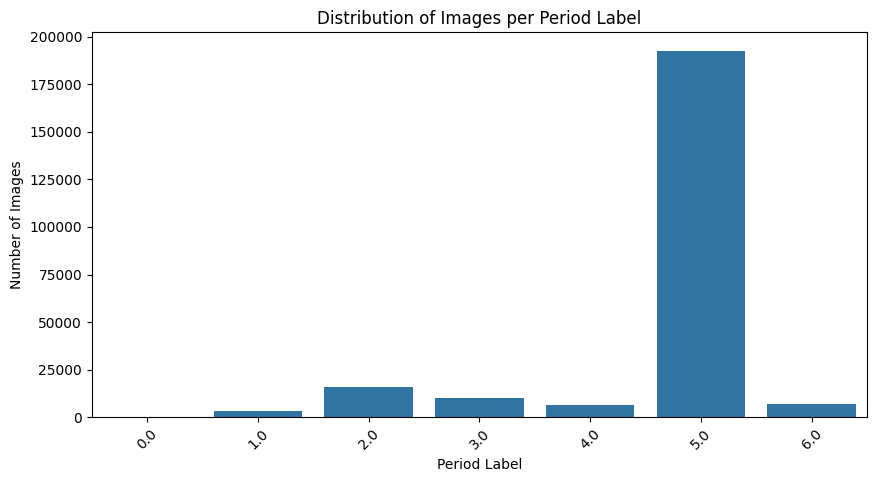

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Period Label")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Period Label")
plt.xticks(rotation=45)
plt.show()

Found 235161 files belonging to 7 classes.


2025-02-19 21:22:52.116590: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


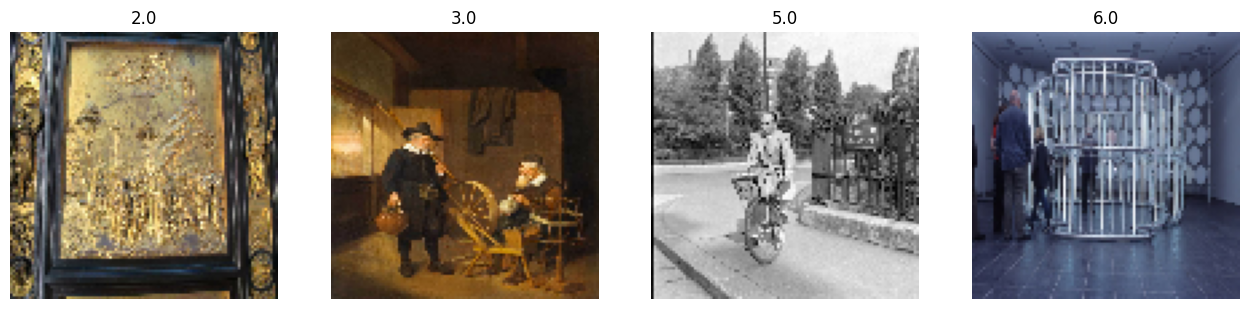

In [17]:
attribute = tf.keras.preprocessing.image_dataset_from_directory(
    root_folder, image_size=(100, 100), batch_size=32, shuffle=True
)

class_names = attribute.class_names

plt.figure(figsize=(20, 25))

for image_batch, label_batch in attribute.take(1):  
    unique_labels = np.unique(label_batch.numpy())
    for i, label in enumerate(unique_labels):
        index = np.where(label_batch.numpy() == label)[0][0] 
        plt.subplot(5, 5, i + 1)
        plt.imshow(np.array(image_batch[index]).astype("uint8"))
        plt.title(class_names[label]) 
        plt.axis("off")

plt.show()
